instalacion de dependecias

In [2]:
!pip install PyPDF2

importacion de documento

In [3]:
from google.colab import files
Uploaded = files.upload()

Saving 3x3x3 Fridrich modificado (español).pdf to 3x3x3 Fridrich modificado (español).pdf


In [6]:
import binascii
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import PyPDF2

# Abre el PDF
with open('3x3x3 Fridrich modificado (español).pdf', 'rb') as pdf_file:
    reader = PyPDF2.PdfReader(pdf_file)

    # Inicializa una cadena vacía para almacenar todo el texto
    all_text = ""

    # Itera sobre todas las páginas
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]  # Obtén la página actual
        all_text += page.extract_text()  # Añade el texto de la página a all_text


# Divide en secuencias (igual que antes)
# Encode to hexadecimal
hex_text = binascii.hexlify(all_text.encode('utf-8')).decode('utf-8')

# Divide into sequences (example)
seq_length = 1
sequences = [hex_text[i:i+seq_length] for i in range(0, len(hex_text), seq_length)]
print(sequences)
# **Fixed: Convert sequences to list of strings first before applying join**
hex_to_int = {char: i for i, char in enumerate(set(''.join(map(str,sequences))))}
sequences = [[hex_to_int[char] for char in seq] for seq in sequences]
print(sequences)

['4', '9', '6', '2', '6', '5', '7', '2', '6', 'f', '2', '0', '5', '2', '7', '5', '6', '2', '6', '9', '6', 'b', '0', 'a', '4', '3', '7', '5', '6', '2', '6', 'f', '2', '0', '6', '4', '6', '5', '2', '0', '3', '3', '7', '8', '3', '3', '7', '8', '3', '3', '0', 'a', '4', 'd', 'c', '3', 'a', '9', '7', '4', '6', 'f', '6', '4', '6', 'f', '2', '0', '4', '6', '7', '2', '6', '9', '6', '4', '7', '2', '6', '9', '6', '3', '6', '8', '2', '0', '2', '8', '6', 'd', '6', 'f', '6', '4', '6', '9', 'e', 'f', 'a', 'c', '8', '1', '6', '3', '6', '1', '6', '4', '6', 'f', '2', '9', '0', 'a', '4', '3', '6', 'f', '7', '0', '7', '9', '7', '2', '6', '9', '6', '7', '6', '8', '7', '4', '2', '0', '3', '2', '3', '0', '3', '1', '3', '3', '2', 'd', '3', '2', '3', '0', '3', '1', '3', '5', '2', '0', '4', '9', '6', '2', '6', '5', '7', '2', '6', 'f', '2', '0', '5', '2', '7', '5', '6', '2', '6', '9', '6', 'b', '2', 'e', '0', 'a', '4', '5', '7', '3', '7', '4', '6', '1', '2', '0', '6', 'f', '6', '2', '7', '2', '6', '1', '2', '0',

In [1]:
!pip install pdfminer.six

Extraccion de valores

In [5]:
import pdfminer.high_level

def vectorizar_hexadecimal(texto):
    """Vectoriza el texto convirtiendo cada carácter a su valor hexadecimal."""
    vector = [hex(ord(c))[2:] for c in texto]  # [2:] para eliminar el prefijo "0x"
    return vector

def procesar_pdf_hex(pdf_path):
    """Procesa el PDF y vectoriza el texto usando valores hexadecimales."""
    with open(pdf_path, 'rb') as pdf_file:
        text = pdfminer.high_level.extract_text(pdf_file)

    # Dividir el texto en páginas (si es necesario)
    paginas = text.split('\n\n')

    # Vectorizar cada página
    vectores_paginas = [vectorizar_hexadecimal(pagina) for pagina in paginas]

    return vectores_paginas

# Ejemplo de usoDo-doc-docu.pdf
pdf_path = "3x3x3 Fridrich modificado (español).pdf"
vectores = procesar_pdf_hex(pdf_path)

# Imprimir los vectores de las primeras 5 páginas
for i in range(19):
    print(f"Página {i + 1}: {vectores[i]}")  # Imprimir los primeros 20 caracteres

Página 1: ['49', '62', '65', '72', '6f', '20', '52', '75', '62', '69', '6b']
Página 2: ['43', '75', '62', '6f', '20', '64', '65', '20', '33', '78', '33', '78', '33']
Página 3: ['4d', 'e9', '74', '6f', '64', '6f', '20', '46', '72', '69', '64', '72', '69', '63', '68', '20', '28', '6d', '6f', '64', '69', 'fb01', '63', '61', '64', '6f', '29']
Página 4: ['c', '43', '6f', '70', '79', '72', '69', '67', '68', '74', '20', '32', '30', '31', '33', '2d', '32', '30', '31', '35', '20', '49', '62', '65', '72', '6f', '20', '52', '75', '62', '69', '6b', '2e']
Página 5: ['45', '73', '74', '61', '20', '6f', '62', '72', '61', '20', '65', '73', '74', 'e1', '20', '73', '75', '6a', '65', '74', '61', '20', '61', '20', '6c', '61', '20', '6c', '69', '63', '65', '6e', '63', '69', '61', '20', '52', '65', '63', '6f', '6e', '6f', '63', '69', '6d', '69', '65', '6e', '74', '6f', '2d', '4e', '6f', '43', '6f', '6d', '65', '72', '63', '69', '61', '6c', '2d', '43', '6f', '6d', '70', '61', '72', '74', '69', '72', '49', '6

In [ ]:
import pdfminer.high_level

def vectorizar_hexadecimal(texto):
    """Vectoriza el texto convirtiendo cada carácter a su valor hexadecimal."""
    vector = [(hex(ord(c))[2:], c) for c in texto]  # Incluir el carácter original
    return vector

def procesar_pdf_hex(pdf_path):
    """Procesa el PDF y vectoriza el texto usando valores hexadecimales."""
    with open(pdf_path, 'rb') as pdf_file:
        text = pdfminer.high_level.extract_text(pdf_file)

    # Dividir el texto en páginas (si es necesario)
    paginas = text.split('\n\n')

    # Vectorizar cada página
    vectores_paginas = [vectorizar_hexadecimal(pagina) for pagina in paginas]

    return vectores_paginas

# Ejemplo de uso
pdf_path = "3x3x3 Fridrich modificado (español).pdf"
vectores = procesar_pdf_hex(pdf_path)

# Imprimir los vectores de las primeras 5 páginas con el texto original
for i in range(18):
    print(f"Página {i + 1}:")
    for hex_val, char in vectores[i][:535000]:  # Iterar sobre tuplas (hex_val, char)
        print(f"  Hex: {hex_val}, Carácter: {char}")
    print("\n")

In [11]:

import binascii
import numpy as np
import PyPDF2

def procesar_pagina_pdf(pdf_path, pagina=1):
    """
    Procesa una página específica de un PDF, extrae valores hexadecimales, los convierte a enteros y crea vectores.

    Args:
        pdf_path (str): Ruta al archivo PDF.
        pagina (int): Índice de la página a procesar (comenzando desde 0).

    Returns:
        list: Lista de vectores de enteros.
    """

    with open(pdf_path, 'rb') as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        page = reader.pages[pagina]
        texto = page.extract_text()

    # Convertir a hexadecimal y luego a enteros
    hex_valores = binascii.hexlify(texto.encode('utf-8')).decode('utf-8')
    enteros = [int(hex_str, 16) for hex_str in hex_valores]

    # Imprimir los valores hexadecimales y enteros originales
    print("Valores hexadecimales originales:")
    print(hex_valores)
    print("Valores enteros originales:")
    print(enteros)

    # Crear una copia de la lista de enteros
    enteros_copia = enteros.copy()

    # Vectorizar los enteros (por ejemplo, one-hot encoding)
    # Ajusta el rango máximo según tus datos
    max_valor = max(enteros_copia)
    vectores = np.eye(max_valor + 1)[enteros_copia]

    # Imprimir los vectores
    print("Vectores:")
    print(vectores)

    np.save("vectores.npy", vectores)

    # Reconstruir el texto original
    enteros_reconstruidos = np.argmax(vectores, axis=1)
    hex_reconstruidos = [hex(x)[2:] for x in enteros_reconstruidos]  # Quitar el '0x'
    texto_reconstruido = binascii.unhexlify(''.join(hex_reconstruidos)).decode('utf-8')

    print("Texto reconstruido:")
    print(texto_reconstruido)

    return vectores, texto_reconstruido


    return vectores

# Ejemplo de uso
pdf_path = "3x3x3 Fridrich modificado (español).pdf"
pagina_a_procesar = 17
vectores_resultantes = procesar_pagina_pdf(pdf_path, pagina_a_procesar)

Valores hexadecimales originales:
372e205065726d7574616369c3b36e2064652065737175696e61730a556e612076657a20636f6c6f6361646173206c617320617269737461732c2074616e20736f6c6f2066616c7461207065726d75746172206c61732065737175696e61732e204c617320706f736962696c69646164657320736f6e20c3a973746173202843756164726f203133292e0a43756164726f2031333a205065726d7574616369c3b36e2064652065737175696e61730a4361736f2046696775726120446573637269706369c3b36e20416c676f7269746d6f730a310a436f6e20756e206769726f20646f626c65206465206c612063617061207375706572696f7220706173610a612073657220756e61207065726d7574616369c3b36e20646520617269737461730a28696e74657263616d62696164617320656e206372757a293a204132202d204d3241202d204d324132202d204d3241202d204d320a5532202d204d3255202d204d325532202d204d3255202d204d320a320a443254324446202d2044e280995432202d204446e28099440a523242325246202d2052e280994232202d205246e28099520a330a20496e766572736f2064656c206361736f20616e746572696f722e44e280994644e28099202d20543244202d2046e2809944e28099543244320a52

Modelo

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np # added import for numpy

# Load the vectors from the file
vectores = np.load("vectores.npy") # load vectors from file

# Split the data into training and validation sets
# Adjust the split ratio (e.g., 0.8 for 80% training, 20% validation) as needed
split_ratio = 0.5
split_index = int(split_ratio * len(vectores))
vectores_train = vectores[:split_index]  # Training data
vectores_val = vectores[split_index:]  # Validation data


# Definir el tamaño de entrada (ajusta según tus vectores)
input_dim = vectores.shape[1]

encoding_dim = 5  # Tamaño de la representación latente
  # Define la dimensión de tus datos de entrada

# Crear el encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(9, activation='relu')(input_img)  # Capa oculta adicional
encoded = Dense(5, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Crear el decoder
decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(9, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Crear el autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Now you can use vectores_val in the fit method:
autoencoder.fit(vectores_train, vectores_train,  # Use training data for fitting
                epochs=500,
                batch_size=16,
                shuffle=False,
                validation_data=(vectores_val, vectores_val)) # Use validation data

entrenamiento

In [ ]:
import numpy as np
from tensorflow import keras  # Updated import for TensorFlow 2.x compatibility

# Fijar las semillas
np.random.seed(2)
tf.random.set_seed(2)
keras.utils.set_random_seed(2)
tf.config.experimental.enable_op_determinism()

# Load the vectors from the file
vectores = np.load("vectores.npy")

# Split the data into training and validation sets (80% training, 20% validation)
split_ratio = 0.8
split_index = int(split_ratio * len(vectores))
vectores_train = vectores[:split_index]
vectores_val = vectores[split_index:]

# Define the input dimension based on your vector shape
input_dim = vectores.shape[1]

# Choose the encoding dimension (experiment with different values)
encoding_dim = 5

def create_encoder(input_dim, encoding_dim):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(9, activation='relu')(input_img)  # Additional hidden layer
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    return Model(inputs=input_img, outputs=encoded, name="encoder")  # Create encoder sub-model

# Create the decoder model (mirrored from the encoder)
def create_decoder(encoding_dim, input_dim):
    encoded = Input(shape=(encoding_dim,))
    decoded = Dense(9, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    return Model(inputs=encoded, outputs=decoded, name="decoder") # Create decoder sub-model

input_layer = Input(shape=(input_dim,))  # Define a single input layer
encoder_model = create_encoder(input_dim, encoding_dim)  # Instantiate encoder
decoder_model = create_decoder(encoding_dim, input_dim)  # Instantiate decoder

# Pass the input through the encoder and decoder
encoded = encoder_model(input_layer)
decoded = decoder_model(encoded)

# Create the autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder with appropriate optimizer and loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# EarlyStopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=0.005,  # Detener inmediatamente al alcanzar el umbral
                                              min_delta=0.001,  # Umbral de mejora mínima
                                              restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss (fixed filepath)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                 monitor='val_loss',
                                                 save_best_only=True)

# ReduceLROnPlateau callback to reduce learning rate if validation loss plateaus
reduce_lr_on_plateau = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                        factor=0.2,
                                                        patience=1,
                                                        min_lr=0.007)

# TensorBoard callback for visualization (optional)
# tensorboard = keras.callbacks.TensorBoard(log_dir='tensorboard_logs')  # Uncomment for TensorBoard

# Train the autoencoder with callbacks for best model, early stopping, and reduced learning rate
callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau]
autoencoder.fit(vectores_train, vectores_train,
                epochs=500,
                batch_size=1,
                shuffle=False,
                validation_data=(vectores_val, vectores_val),
                callbacks=callbacks)  # Add callbacks

# Access and save the best model weights and activations (example)
best_model = keras.models.load_model('best_model.keras')  # Load the best model
#best_weights = best_model.get_weights()  # Get weights of all layers
#best_activations = np.array([layer.output for layer in best_model.layers])  # Get activations (consider specific layers)

# Save weights and activations to separate files (example)
##np.save('best_weights.npy', best_weights)
#np.save('best_activations.npy', best_activations)

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras  # Updated import for TensorFlow 2.x compatibility

# Fijar las semillas
np.random.seed(2)
tf.random.set_seed(2)
keras.utils.set_random_seed(2)
tf.config.experimental.enable_op_determinism()

# Load the vectors from the file
vectores = np.load("vectores.npy")

# Split the data into training and validation sets (80% training, 20% validation)
split_ratio = 0.8
split_index = int(split_ratio * len(vectores))
vectores_train = vectores[:split_index]
vectores_val = vectores[split_index:]

# Define the input dimension based on your vector shape
input_dim = vectores.shape[1]

# Choose the encoding dimension (experiment with different values)
encoding_dim = 5

def create_encoder(input_dim, encoding_dim):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(9, activation='relu')(input_img)  # Additional hidden layer
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    return Model(inputs=input_img, outputs=encoded, name="encoder")  # Create encoder sub-model

# Create the decoder model (mirrored from the encoder)
def create_decoder(encoding_dim, input_dim):
    encoded = Input(shape=(encoding_dim,))
    decoded = Dense(9, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    return Model(inputs=encoded, outputs=decoded, name="decoder") # Create decoder sub-model

input_layer = Input(shape=(input_dim,))  # Define a single input layer
encoder_model = create_encoder(input_dim, encoding_dim)  # Instantiate encoder
decoder_model = create_decoder(encoding_dim, input_dim)  # Instantiate decoder

# Pass the input through the encoder and decoder
encoded = encoder_model(input_layer)
decoded = decoder_model(encoded)

# Create the autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder with appropriate optimizer and loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# EarlyStopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=0.005,  # Detener inmediatamente al alcanzar el umbral
                                              min_delta=0.001,  # Umbral de mejora mínima
                                              restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss (fixed filepath)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                 monitor='val_loss',
                                                 save_best_only=True)

# ReduceLROnPlateau callback to reduce learning rate if validation loss plateaus
reduce_lr_on_plateau = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                        factor=0.2,
                                                        patience=1,
                                                        min_lr=0.007)

# TensorBoard callback for visualization (optional)
# tensorboard = keras.callbacks.TensorBoard(log_dir='tensorboard_logs')  # Uncomment for TensorBoard

# Train the autoencoder with callbacks for best model, early stopping, and reduced learning rate
callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau]
autoencoder.fit(vectores_train, vectores_train,
                epochs=500,
                batch_size=1,
                shuffle=False,
                validation_data=(vectores_val, vectores_val),
                callbacks=callbacks)  # Add callbacks

# Access and save the best model weights and activations (example)
best_model = keras.models.load_model('best_model.keras')  # Load the best model
#best_weights = best_model.get_weights()  # Get weights of all layers
#best_activations = np.array([layer.output for layer in best_model.layers])  # Get activations (consider specific layers)

# Save weights and activations to separate files (example)
##np.save('best_weights.npy', best_weights)
#np.save('best_activations.npy', best_activations)

Epoch 1/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4143 - val_loss: 0.1785 - learning_rate: 0.0010
Epoch 2/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1587 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 3/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1000 - val_loss: 0.0730 - learning_rate: 0.0010
Epoch 4/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0635 - val_loss: 0.0474 - learning_rate: 0.0010
Epoch 5/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0410 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 6/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0243 - val_loss: 0.0164 - learning_rate: 0.0010
Epoch 7/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0155 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 8/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0108 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 9/500
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0078 - val_loss: 0.0048 - learning_rate: 0.0010
E

Comprobacion de datos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[8.56706715e+00 3.37031364e-01 1.48187351e+01 1.28753605e+01
  0.00000000e+00]
 [9.84970093e+00 1.34866762e+01 1.05026281e+00 6.58185625e+00
  0.00000000e+00]
 [1.59466629e+01 7.05332565e+00 6.49672842e+00 1.35783043e+01
  0.00000000e+00]
 [1.03959398e+01 4.62780523e+00 8.75513840e+00 5.50090027e+00
  8.51616263e-03]
 [1.59466629e+01 7.05332565e+00 6.49672842e+00 1.35783043e+01
  0.00000000e+00]
 [7.84048259e-01 3.16785264e+00 5.89200211e+00 2.16074409e+01
  0.00000000e+00]
 [5.65184021e+00 6.20190811e+00 0.00000000e+00 1.21105556e+01
  0.00000000e+00]
 [7.84048259e-01 3.16785264e+00 5.89200211e+00 2.16074409e+01
  0.00000000e+00]
 [0.00000000e+00 1.33976326e+01 1.42996464e+01 1.25471754e+01
  0.00000000e+00]
 [5.65184021e+00 6.20190811e+00 0.00000000e+00 1.21105556e+01
  0.00000000e+00]
 [9.84970093e+00 1.34866762e+01 1.05026281e+00 6.58185625e+00
  0.00000000e+00]
 [1.59466629e+01 7.05332565e+00 6.49672842e+00 1.35783043e+01
  0.00000000e+00]
 [

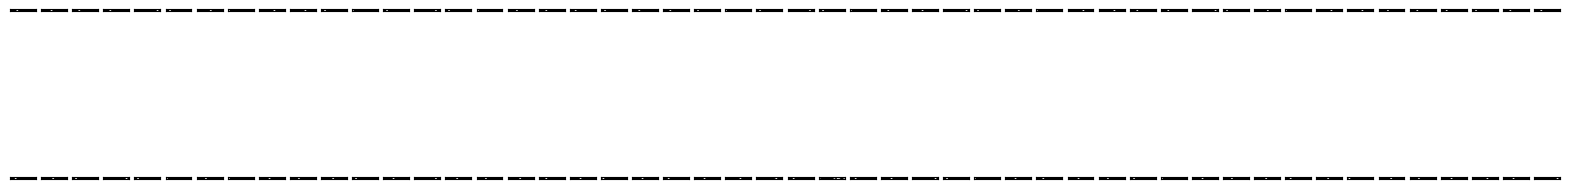

In [51]:
# Obtener la representación latente
encoder = Model(input_img, encoded)
encoded_imgs = encoder_model.predict(vectores[:15])

print(encoded_imgs)

# Reconstruir los datos
decoded_imgs = autoencoder.predict(vectores)

# Visualizar los resultados (ejemplo)
import matplotlib.pyplot as plt
n = 50
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(vectores_val[i].reshape(1, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(1, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


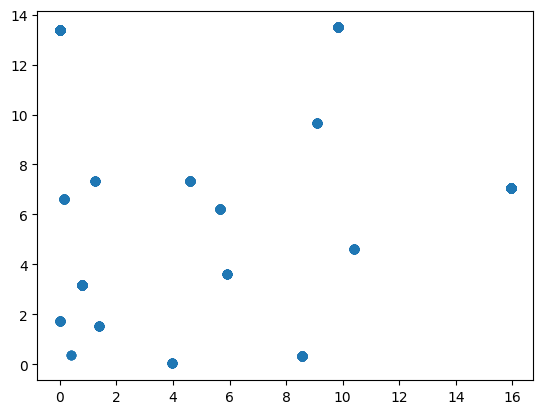

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


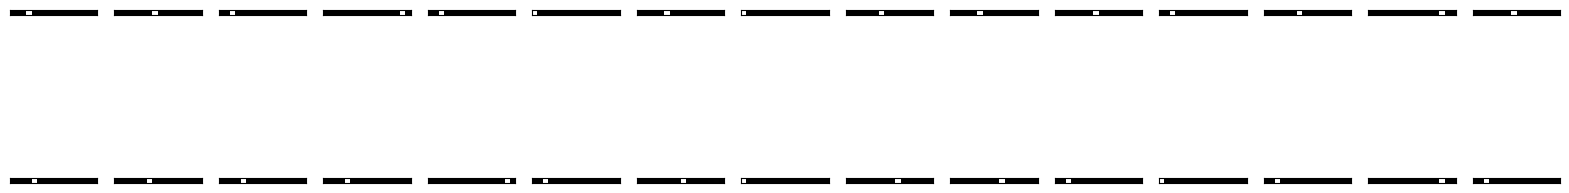

In [52]:

# Suponiendo que tienes un autoencoder entrenado y tus datos de prueba en X_test

# Obtener la representación latente
encoded_imgs = encoder_model.predict(vectores)

# Visualizar la representación latente en 2D (si la dimensión es 2)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1])
plt.show()

# Calcular el error de reconstrucción
decoded_imgs = autoencoder.predict(vectores_val)
mse = np.mean(np.power(vectores_val - decoded_imgs, 2), axis=1)

# Visualizar las imágenes originales y sus reconstrucciones
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(vectores[i].reshape(1, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(1, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()